# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [8]:
import pandas as pd
import statsmodels.api as sm
import patsy
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

tips = sns.load_dataset("tips")

tips["net_bill"] = tips["total_bill"] - tips["tip"]


In [2]:
formula = 'tip ~ sex + smoker + time + net_bill'

y, X = patsy.dmatrices(formula, data=tips, return_type='dataframe')

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.64e-20
Time:                        22:35:03   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

In [3]:
formula_reduced = 'tip ~ time + net_bill'
y_red, X_red = patsy.dmatrices(formula_reduced, data=tips, return_type='dataframe')

model_reduced = sm.OLS(y_red, X_red).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           6.62e-22
Time:                        22:38:31   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.3015      0.191      6.

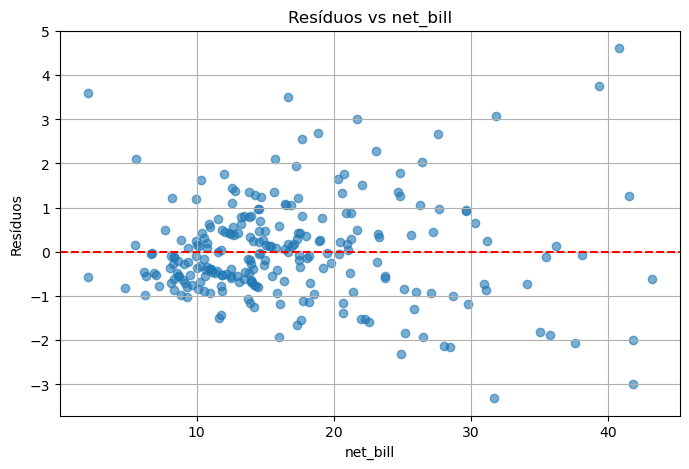

In [4]:
residuos = model_reduced.resid
net_bill = tips["net_bill"]

plt.figure(figsize=(8, 5))
plt.scatter(net_bill, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill")
plt.grid(True)
plt.show()

In [5]:
tips["log_net_bill"] = np.log(tips["net_bill"])

formula_log = 'tip ~ time + log_net_bill'
y_log, X_log = patsy.dmatrices(formula_log, data=tips, return_type='dataframe')

model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.90e-19
Time:                        22:38:48   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2818      0.433     -2.

In [6]:
tips["net_bill_squared"] = tips["net_bill"] ** 2

formula_poly = 'tip ~ time + net_bill + net_bill_squared'
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips, return_type='dataframe')

model_poly = sm.OLS(y_poly, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     40.23
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           4.23e-21
Time:                        22:38:54   Log-Likelihood:                -375.25
No. Observations:                 244   AIC:                             758.5
Df Residuals:                     240   BIC:                             772.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0543      0.361  

In [7]:
print(f"R² ajustado - linear: {model_reduced.rsquared_adj:.4f}")
print(f"R² ajustado - log:    {model_log.rsquared_adj:.4f}")
print(f"R² ajustado - polinômio: {model_poly.rsquared_adj:.4f}")

print(f"AIC - linear: {model_reduced.aic:.2f}")
print(f"AIC - log:    {model_log.aic:.2f}")
print(f"AIC - poly:   {model_poly.aic:.2f}")

R² ajustado - linear: 0.3273
R² ajustado - log:    0.2894
R² ajustado - polinômio: 0.3263
AIC - linear: 757.15
AIC - log:    770.53
AIC - poly:   758.49


In [ ]:
O melhor modelo apresentado é, o modelo linear.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
tips = sns.load_dataset("tips").copy()
tips["net_bill"] = tips["total_bill"] - tips["tip"]

tips_filtered = tips[tips["tip"] > 0].copy()

tips_filtered["log_tip"] = np.log(tips_filtered["tip"])


In [10]:
formula = "log_tip ~ sex + smoker + time + net_bill"
y, X = patsy.dmatrices(formula, data=tips_filtered, return_type='dataframe')

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.21e-18
Time:                        22:47:35   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

In [11]:
formula_red = "log_tip ~ time + net_bill"
y_red, X_red = patsy.dmatrices(formula_red, data=tips_filtered, return_type='dataframe')

model_red = sm.OLS(y_red, X_red).fit()
print(model_red.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     54.36
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           3.27e-20
Time:                        22:47:39   Log-Likelihood:                -97.837
No. Observations:                 244   AIC:                             201.7
Df Residuals:                     241   BIC:                             212.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4855      0.061      7.

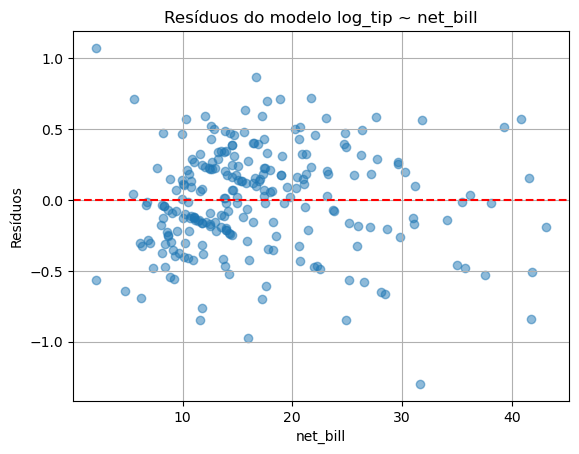

In [12]:
residuos = model_red.resid
plt.scatter(tips_filtered["net_bill"], residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos do modelo log_tip ~ net_bill")
plt.grid(True)
plt.show()

In [13]:
tips_filtered["log_net_bill"] = np.log(tips_filtered["net_bill"])
formula_log = "log_tip ~ time + log_net_bill"
y_log, X_log = patsy.dmatrices(formula_log, data=tips_filtered, return_type='dataframe')
model_log = sm.OLS(y_log, X_log).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.60
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           7.06e-21
Time:                        22:47:48   Log-Likelihood:                -96.286
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.3997      0.134     -2.

In [14]:
tips_filtered["net_bill_squared"] = tips_filtered["net_bill"]**2
formula_poly = "log_tip ~ time + net_bill + net_bill_squared"
y_poly, X_poly = patsy.dmatrices(formula_poly, data=tips_filtered, return_type='dataframe')
model_poly = sm.OLS(y_poly, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                log_tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     40.77
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.50e-21
Time:                        22:47:55   Log-Likelihood:                -93.018
No. Observations:                 244   AIC:                             194.0
Df Residuals:                     240   BIC:                             208.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1857      0.114  

In [15]:
print(f"R² ajustado - linear: {model_red.rsquared_adj:.4f}, AIC: {model_red.aic:.2f}")
print(f"R² ajustado - log:    {model_log.rsquared_adj:.4f}, AIC: {model_log.aic:.2f}")
print(f"R² ajustado - poly:   {model_poly.rsquared_adj:.4f}, AIC: {model_poly.aic:.2f}")

R² ajustado - linear: 0.3052, AIC: 201.67
R² ajustado - log:    0.3139, AIC: 198.57
R² ajustado - poly:   0.3293, AIC: 194.04


In [16]:
pred_log = model_poly.fittedvalues
pred_tip = np.exp(pred_log)

r2_original = r2_score(tips_filtered["tip"], pred_tip)
print(f"R² na escala original (tip): {r2_original:.4f}")

R² na escala original (tip): 0.3089


In [ ]:
O R² no modelo Log é melhor.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [17]:
df = pd.read_csv("previsao_de_renda.csv")

print(df.head())

print(df.info())

print(df.isnull().sum())

   Unnamed: 0    data_ref  index sexo  posse_de_veiculo  posse_de_imovel  \
0           0  2015-01-01   8682    F             False             True   
1           1  2015-01-01  12830    M              True             True   
2           2  2015-01-01   2885    M              True             True   
3           3  2015-01-01  16168    F              True            False   
4           4  2015-01-01  12438    M             False            False   

   qtd_filhos   tipo_renda           educacao estado_civil tipo_residencia  \
0           1  Assalariado         Secundário       Casado            Casa   
1           0   Empresário         Secundário       Casado            Casa   
2           2  Assalariado  Superior completo       Casado            Casa   
3           0   Empresário         Secundário       Casado            Casa   
4           0  Assalariado         Secundário       Casado            Casa   

   idade  tempo_emprego  qt_pessoas_residencia    mau    renda  
0     36 

In [20]:
df["tempo_emprego"] = df["tempo_emprego"].astype(str).str.replace(",", ".").astype(float)



In [22]:
df_simple = df[["renda", "tempo_emprego"]].dropna()

X = sm.add_constant(df_simple["tempo_emprego"])
y = df_simple["renda"]

modelo_simples = sm.OLS(y, X).fit()
print(modelo_simples.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:58:44   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2653.9453     60.924     43.561

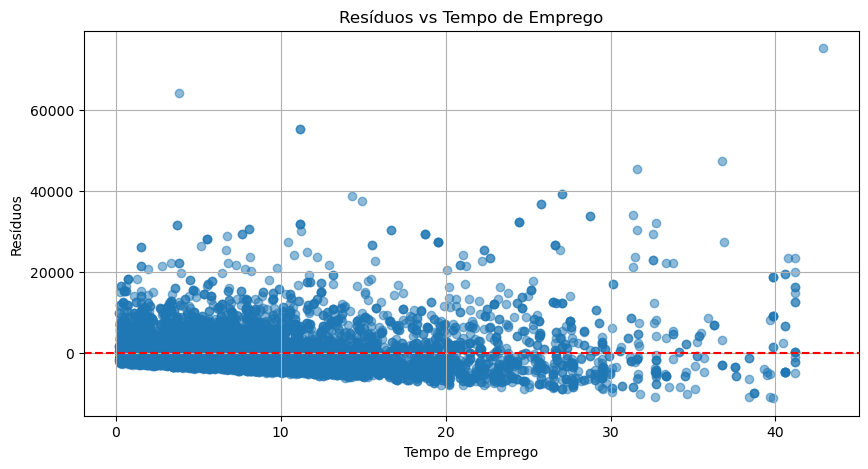

In [23]:
residuos = modelo_simples.resid
preditos = modelo_simples.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(df_simple["tempo_emprego"], residuos, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Tempo de Emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Tempo de Emprego")
plt.grid(True)
plt.show()

In [25]:
df["log_renda"] = np.log(df["renda"])

df["tempo_emprego"] = df["tempo_emprego"].apply(
    lambda x: str(x).replace(",", ".") if pd.notnull(x) else x
).astype(float)

df_model = df.dropna()

print(df_model.columns)

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda', 'log_renda'],
      dtype='object')


In [26]:
formula = """
log_renda ~ idade + sexo + posse_de_veiculo + posse_de_imovel + tipo_renda +
            educacao + estado_civil + tipo_residencia + tempo_emprego + qt_pessoas_residencia
"""

y, X = patsy.dmatrices(formula, data=df_model, return_type="dataframe")

modelo_multiplo = sm.OLS(y, X).fit()
print(modelo_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:01:04   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12442   BIC:                         2.663e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [28]:
formula_refinada = """
log_renda ~ idade + tempo_emprego + tipo_renda + educacao
"""

y2, X2 = patsy.dmatrices(formula_refinada, data=df_model, return_type='dataframe')

modelo_refinado = sm.OLS(y2, X2).fit()
print(modelo_refinado.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     231.2
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:03:17   Log-Likelihood:                -13868.
No. Observations:               12466   AIC:                         2.776e+04
Df Residuals:                   12455   BIC:                         2.784e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

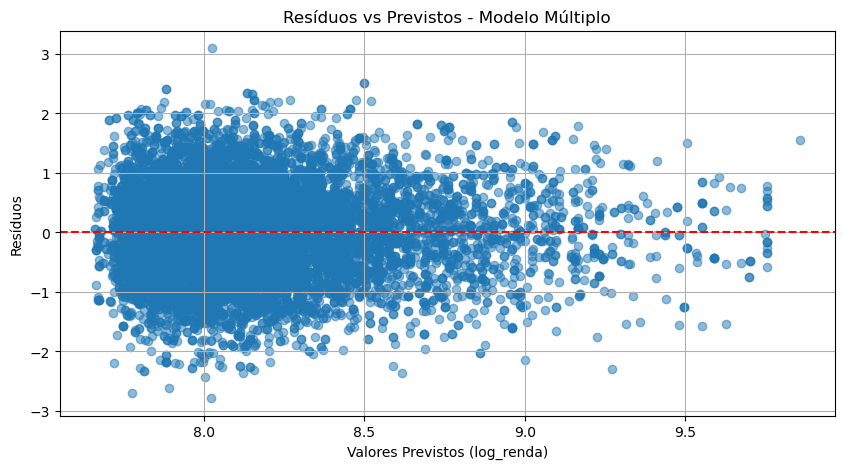

In [29]:
residuos = modelo_refinado.resid
preditos = modelo_refinado.fittedvalues

plt.figure(figsize=(10, 5))
plt.scatter(preditos, residuos, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Previstos (log_renda)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previstos - Modelo Múltiplo")
plt.grid(True)
plt.show()


In [ ]:
O gráfico sinaliza a presença de heterocedasticidade, o que pode comprometer a validade dos intervalos de confiança e testes de hipóteses do modelo.